# Lab 1

## A little statistics

### 1. Normal Distribution

A. The normal distribution is symmetrical which have the mean, median and mode are all equal. Its most popular values are in the middle and has skinny tails to either side. The standard normal distribution is a general normal distribution with the mean $\mu = 0$ and the standard deviation square $\sigma^2 = 1$. NOTE: the 'signma' in this lab is not standard deviation, it is z-score.

B. To find the probability associated with 'sigma', we use the cumulative density function (.cdf()) to integrated the standard normal distribution. 
Using the equation and the Z-table in Wikipedia to check the probability with different values of 'sigma':
Cumulative from mean (0 to Z) equation:
$$f(z) = \phi(z) - \frac{1}{2}$$

In [113]:
import scipy
from scipy import stats
z=1.02
prob= stats.norm.cdf(z)-0.5
print('probability associated with sigma=',z,'is', prob)

probability associated with sigma= 1.02 is 0.3461357696272652


In [114]:
z=0.08
prob= stats.norm.cdf(z)-0.5
print('probability associated with sigma=',z,'is', prob)

probability associated with sigma= 0.08 is 0.03188137201398744


In [115]:
z=3.01
prob= stats.norm.cdf(z)-0.5
print('probability associated with sigma=',z,'is', prob)

probability associated with sigma= 3.01 is 0.4986937615512306


C.To do the inverse, determine the associated 'sigma' value for a given probability, we use the percent point function (.ppf())

In [116]:
z=0.1
prob_in=stats.norm.cdf(z)
sigma = stats.norm.ppf(prob_in)
print('For the given probability=',prob_in,"the associated 'sigma'=",sigma)

For the given probability= 0.539827837277029 the associated 'sigma'= 0.10000000000000002


In [117]:
z=2.04
prob_in=stats.norm.cdf(z)
sigma = stats.norm.ppf(prob_in)
print('For the given probability=',prob_in,"the associated 'sigma'=",sigma)

For the given probability= 0.9793248371339299 the associated 'sigma'= 2.039999999999999


In [118]:
z=5
prob_in=stats.norm.cdf(z)
sigma = stats.norm.ppf(prob_in)
print('For the given probability=',prob_in,"the associated 'sigma'=",sigma)

For the given probability= 0.9999997133484281 the associated 'sigma'= 4.999999999970176


D. If the negative sigma appear, that means the data is below the mean. It is in the left half of the normal distribution.

### 2. Rayleigh distribution: 

A. Rayleigh distribution is a distribution of continuous probability density function for positive values. It is a two-dimentional Gaussian distribution with both the means is 0 and same sigma.
The probability density function of Rayleigh distribution is:
$$f(x;\sigma)= \frac{x}{\sigma^2} \exp{\frac{-x^2}{2\sigma^2}}, x\ge0$$

B. Plotting the analytic and realization with 100k samples

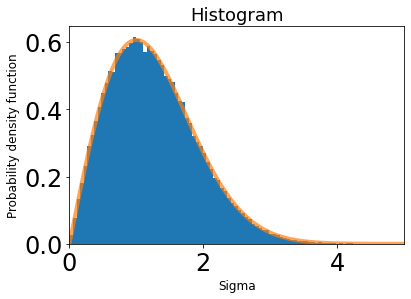

In [119]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats


d = stats.rayleigh.rvs(loc = 0, scale = 1, size = 100000)
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,5])
x = np.linspace(0,5,1000)
ax.plot(x,stats.rayleigh.pdf(x,loc = 0, scale =1),linewidth = 4,alpha = 0.7)
ax.set_xlabel('Sigma', size=12)
ax.set_ylabel('Probability density function', size=12)
ax.set_title('Histogram', size=18)

plt.show()


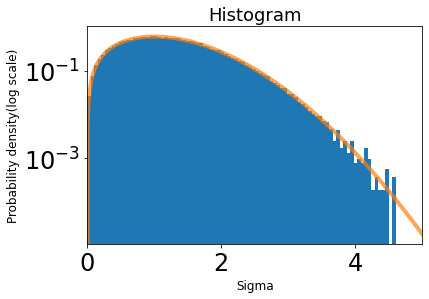

In [120]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.xlim([0,5])
x = np.linspace(0,5,1000)
ax.plot(x,stats.rayleigh.pdf(x,loc = 0, scale = 1),linewidth = 4,alpha = 0.7)
ax.set_xlabel('Sigma', size=12)
ax.set_ylabel('Probability density(log scale)', size=12)
ax.set_title('Histogram', size=18)
plt.show()

### 3.Signal-free data follows Rayleigh distribution

A. Look at the logscale histogram, we sees that there are outliner around 4 sigma. So let choose 4 sigma as our hypothetical measurement.

B. The statistical question could be what is the probalitity that the data point, which 4 sigma away from the mean, that looks as or more signal like?

C. Convert into a mathematical integral

$$f(x;\sigma)= \frac{x}{\sigma^2} \exp{\frac{-x^2}{2\sigma^2}}, x\ge0$$
$$P(x)=\int\limits_4^\infty x\frac{x}{\sigma^2} \exp{\frac{-x^2}{2\sigma^2}} dx$$

D.Using .cdf() to calculate the probability that the background produced the signal

In [121]:
val = 4
prob= stats.rayleigh.cdf(val)
print('The probability is',prob)

The probability is 0.9996645373720975


E.Convert your probability into an equivalent 'sigma'

In [122]:
sigma=stats.rayleigh.ppf(prob)
print("The equivalent 'sigma' for the probability 0.9996645 is ",sigma)

The equivalent 'sigma' for the probability 0.9996645 is  3.9999999999999964


### 4.Try various hypothetical measurement values

In [123]:
val = 1
prob= stats.rayleigh.cdf(val)
print('The probability is',prob)

The probability is 0.3934693402873666


In [124]:
val = 2
prob= stats.rayleigh.cdf(val)
print('The probability is',prob)

The probability is 0.8646647167633873


In [125]:
val = 3
prob= stats.rayleigh.cdf(val)
print('The probability is',prob)

The probability is 0.9888910034617577


As the sigma increase, there more probability that the background gives us more signal-like.

## Non-continuous distributions

### Binomial Distributions

A. The binomial distribution is the discrete probability distribution. It is a type of distribution with only 2 possible outcomes (success or failure) in an experiment with multiple trials. It has 2 parameters: n (the number of independent trials) and p (the success probability).

B.Plotting 

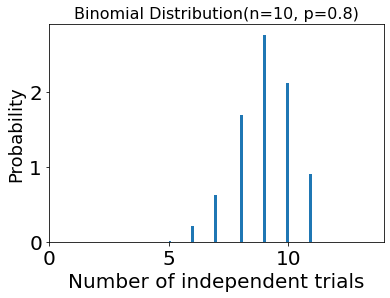

In [126]:
d = stats.binom.rvs(10,0.8,1, size = 1000)

fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.tick_params(labelsize = 20)
plt.xlim([0,14])
plt.xlabel("Number of independent trials", size= 20)
plt.ylabel("Probability", size=18)
plt.title("Binomial Distribution(n=10, p=0.8)", size = 16)
plt.show()

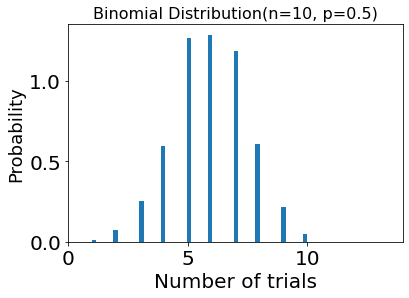

In [127]:
d = stats.binom.rvs(10,0.5,1, size = 1000)

fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.tick_params(labelsize = 20)
plt.xlim([0,14])
plt.xlabel("Number of trials", size= 20)
plt.ylabel("Probability", size=18)
plt.title("Binomial Distribution(n=10, p=0.5)", size = 16)
plt.show()

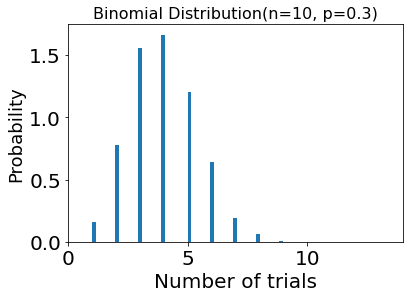

In [128]:
d = stats.binom.rvs(10,0.3,1, size = 1000)

fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.tick_params(labelsize = 20)
plt.xlim([0,14])
plt.xlabel("Number of trials", size= 20)
plt.ylabel("Probability", size=18)
plt.title("Binomial Distribution(n=10, p=0.3)", size = 16)
plt.show()

From the plots above, we see that the Binomial Distribution has a normal distribution shape but shifted depending on the parameter. When the probability p gets lower than 0.5 the curve skew to the right. When the probability p gets bigger than 0.5 the curve skew to the left.

C. Using the last plot in part B, a hypothetical question we can ask is what is the probability to get success with 1 trial?

In [129]:
n, p = 10, 0.3
prob=stats.binom.pmf(1,n,p)
print('the probability to get a success with 1 trial is',prob)

the probability to get a success with 1 trial is 0.12106082100000018


Look at the plot above, we see that the probability 0.12 matched.

D. For binomial distribution, the number of trials must be the whole number, it can not be 1.5 trails. Also, each data point will only have either success or failure outcomes. Since the distributions are discrete, so are the probabilities and 'sigmas'.


E. While the results are discrete, the parameters of the distributions are not. This makes sense because the parameters of the binomial distributions are the probability of success which can take any value from 0 to 1, which means this parameter is not discrete. However, the number of trails is discrete so the results are discrete.